총 당첨금은 총 판매금액의 절반
총 당첨금에서 4,5등의 당첨금을 제외하고 12.5%가 3등의 당첨금액이므로
판매금액은 2*(3등 당첨금*8 + 4등 당첨금 + 5등 당첨금)으로 구할수있다.

이렇게 구한 금액은 백주은 학우님께서 수집해주신 실제 판매량과 최대 0.0005의 오차를 가진다.

이는 무의미한 오차이기에 직접 계산한 판매량으로 분석을 수행한다

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

lotto = pd.read_csv('/home/daniel/code_space/Data-SCI-basic/csv/lotto_hist.csv')
lotto = lotto.loc[::-1].reset_index(drop=True)
pd.options.display.float_format = '{:,.0f}'.format
# pd.set_option('display.max_rows', None)

In [281]:
lotto_sell=np.array(2*(lotto['get_3']*lotto['num_3']*8+(lotto['get_4']*lotto['num_4']+lotto['get_5']*lotto['num_5'])))
lotto_sell=np.concatenate((lotto_sell[:87]/2000,lotto_sell[87:]/1000))
lotto=lotto.assign(sell=lotto_sell)
# lotto_sell
lotto[80:90]

,num,day,num_1,get_1,num_2,get_2,num_3,get_3,num_4,get_4,...,get_5,1,2,3,4,5,6,B,sell_bje,sell
80,81,2004.06.19,5,2714288880,20,113095370,1046,2162436,51654,87580,...,10000,5,7,11,13,20,33,6,30491654,"30,491,702"
81,82,2004.06.26,1,14562494400,20,121354120,637,3810177,36139,134320,...,10000,1,2,3,14,27,42,39,30651404,"30,651,432"
82,83,2004.07.03,2,7086948300,15,157487740,851,2775930,45924,102880,...,10000,6,10,15,17,19,34,14,31256031,"31,256,063"
83,84,2004.07.10,2,7669779000,17,150387824,635,4026131,32402,157805,...,10000,16,23,27,34,42,45,11,31390380,"31,390,393"
84,85,2004.07.17,4,3462109800,31,74453975,823,2804464,41746,110577,...,10000,6,8,13,23,31,36,21,29725652,"29,725,658"
85,86,2004.07.24,1,14252186400,16,148460275,611,3887667,35057,135515,...,10000,2,12,37,39,41,45,33,29917984,"29,918,006"
86,87,2004.07.31,11,1799358055,33,99964337,1250,2639059,54768,120466,...,10000,4,12,16,23,34,43,26,41896821,"41,896,862"
87,88,2004.08.07,4,3069709650,31,66015262,1183,1729902,64639,63321,...,5000,1,17,20,24,30,41,27,51910612,"51,910,747"
88,89,2004.08.14,3,4248321900,30,70805365,1340,1585195,72667,58463,...,5000,4,26,28,29,33,40,37,55102179,"55,102,202"
89,90,2004.08.21,4,3291435300,34,64537948,1297,1691820,67888,64645,...,5000,17,20,29,35,38,44,10,55493544,"55,493,628"


<Axes: xlabel='num'>

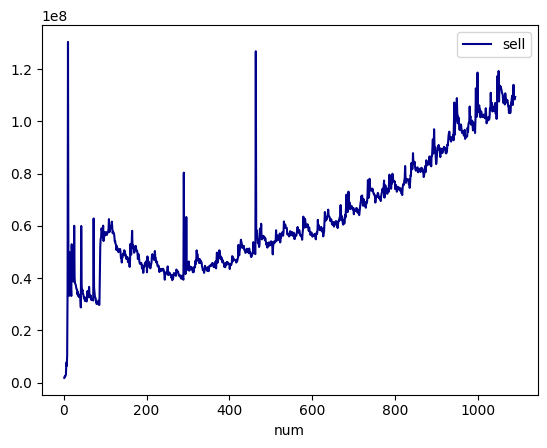

In [282]:
lotto.plot.line(x='num',y='sell',c='DarkBlue')

2003.02.08 10회
2008.06.21 290회
2011.10.22 464회
에서 급격하게 뛰는것을 알수있다.
이는 각각 7~9회 289회 463회에서 1등 당첨자가 나오지 않아서 구매량이 급등한 회차이다.

또한 88회에서 절벽처럼 증가한 부분은 로또가 1회 2000원에서 1000원으로 가격이 내려가며 판매수가 늘어서이다.

(0.9649469957468486, 1.0233172335301914)


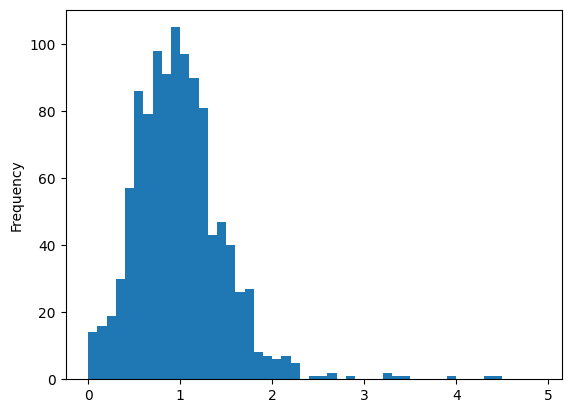

In [283]:
lotto_win=np.array(lotto['num_1']*8145060/lotto['sell'])
lotto=lotto.assign(win=lotto_win)

real_95=scipy.stats.t.interval(0.95, len(lotto['win'])-1, np.mean(lotto['win']), scipy.stats.sem(lotto['win']))

win_bin=np.arange(0,5,0.1)
lotto['win'].plot.hist(bins = win_bin)

print(real_95)
# lotto_win=np.array(lotto['num_1']-lotto['sell']/8145060)
# lotto=lotto.assign(win=lotto_win)
# lotto.plot.line(x='num',y='win',c='DarkBlue')

예상 1등 당첨자 수로 실제 당첨자 수를 나누면 정규분포를 따른다.

<Axes: >

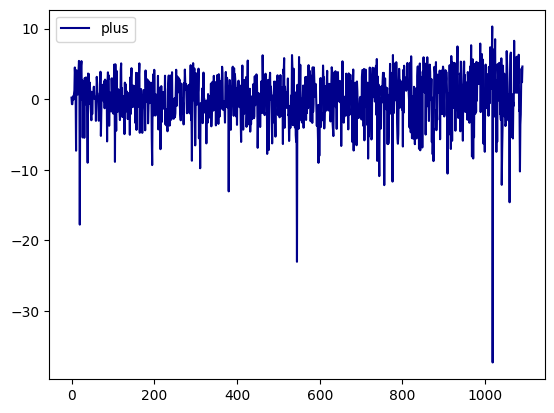

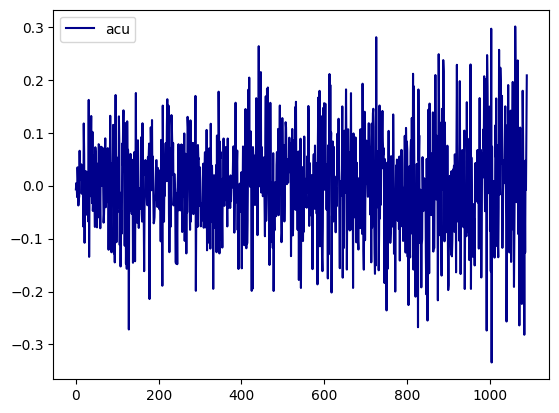

In [293]:
sampling_lotto = pd.read_csv('/home/daniel/code_space/Data-SCI-basic/csv/lotto_sampling.csv')
sampling_plus=np.array(np.sum(sampling_lotto,axis=1)/1000)
sampling_lotto=sampling_lotto.assign(plus=sampling_plus)
sampling_lotto=sampling_lotto.assign(acu=sampling_plus)

# sampling_lotto['plus']=np.log10(lotto['sell']/sampling_lotto['plus'])
sampling_lotto['plus']=sampling_lotto['plus']-lotto['num_1']
sampling_lotto.plot.line(y='plus',c='DarkBlue')

sampling_lotto['acu']=sampling_lotto['acu']-lotto['sell']/8145060
sampling_lotto.plot.line(y='acu',c='DarkBlue')
# bin_sim=np.arange(-35,35,1)
# sim_lotto['abs'].plot.hist(bins = bin_sim)

한승규 학우님께서 공유해주신 단순 샘플링 자료로 
1~8145060에서 샘플링한 결과가 실제 로또를 검증할수 있는 지를 확인하려 한다

1000회 샘플링으로 나온 1등 횟수를 회차별로 평균을 내고 
그 값을 실제 당첨자로 빼주었다.

0에 근접한 경향성을 띄므로 단순 샘플링 또한 실제 로또를 검증할수있다

<Axes: >

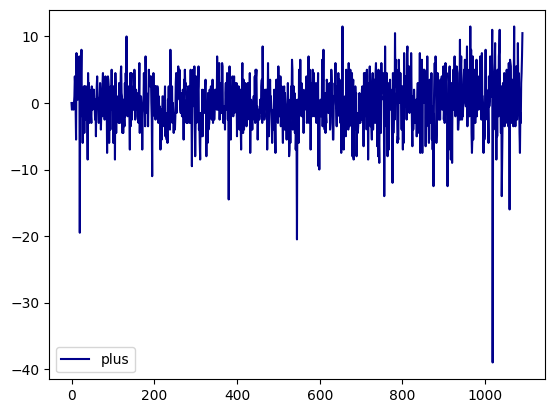

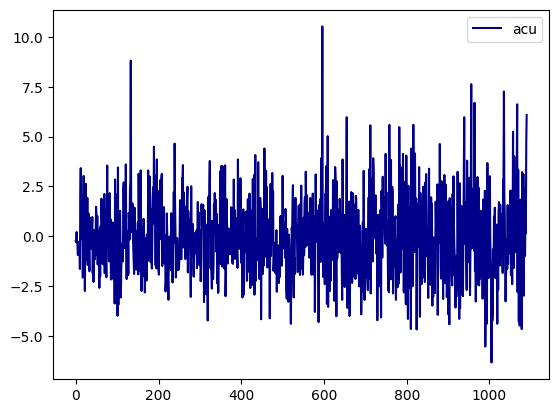

In [294]:
simul_lotto = pd.read_csv('/home/daniel/code_space/Data-SCI-basic/csv/lotto_simulation.csv')
simul_plus=(simul_lotto['sim_1']+simul_lotto['sim_2'])/2
simul_lotto=simul_lotto.assign(plus=simul_plus-lotto['num_1'])
simul_lotto=simul_lotto.assign(acu=simul_plus-lotto['sell']/8145060)

simul_lotto.plot.line(y='plus',c='DarkBlue')
simul_lotto.plot.line(y='acu',c='DarkBlue')


한승규 학우님께서 공유해주신 실제 로또 방식의 시뮬레이션도
단순 샘플링처럼 가공하였다.

시뮬레이션 또한 0에 근접하는 경향성을 띈다